In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [28]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# Max 500
n_estimators = [100,300,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Max Depth upper limit = 30
# 3-10, 15, 20
max_depth = [3,4,5,6,7,8,9,10,15,20,25,30]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
# 1-16
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [100, 300, 500]}


In [1]:
import pandas as pd
data = pd.read_csv("/Users/wyatteng/Desktop/4dgb/8.9.21_RandomForest/10.18.21_CTCF_RF_Input/CTCF_4000_R1_H3K27ac_RF_Input.bed",delimiter="\t")
data.head()

,Chrom,Start,End,Fragments,Fpkm,Sumdepth,Avedepth,Maxdepth,Stddepth,Bases,Coverage,Normalized,ATAC_Peak,CTCF_Binding_Sites
0,chr1,1,4000,0,0.000000,0,0.000,0,0.000000,0,0.00000,0.000000,0,0
1,chr1,4001,8000,0,0.000000,0,0.000,0,0.000000,0,0.00000,0.000000,0,0
2,chr1,8001,12000,29,0.088632,1508,0.377,14,4.246765,299,0.07475,0.086372,0,0
3,chr1,12001,16000,0,0.000000,0,0.000,0,0.000000,0,0.00000,0.000000,0,0
4,chr1,16001,20000,6,0.018338,312,0.078,3,0.854084,210,0.05250,0.017870,0,0


In [2]:
X=data[['Normalized', 'Fragments', 'Coverage', 'Fpkm', 'Sumdepth', 'Avedepth', 'Maxdepth', 'Stddepth', 'Bases', 'CTCF_Binding_Sites']]  # Features
y=data['ATAC_Peak']  # Labels

In [3]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False) # 70% training and 30% test

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      15, 20, 25, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, verbose=2)

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=16, min_samples_split=15, n_estimators=100; total time=  40.3s
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time= 9.7min
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=14, min_samples_split=15, n_estimators=500; total time= 2.6min
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=12, min_samples_split=15, n_estimators=300; total time= 1.5min
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=12, min_samples_split=15, n_estimators=300; total time= 1.7min
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=500; total time=10.2min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time= 4.8min
[CV] END bootstrap=True, max_depth=8

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=16, min_samples_split=15, n_estimators=100; total time=  38.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 9.4min
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=14, min_samples_split=15, n_estimators=500; total time= 2.6min
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=14, min_samples_split=15, n_estimators=500; total time= 2.6min
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=12, min_samples_split=15, n_estimators=300; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=500; total time=10.2min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time= 5.5min
[CV] END bootstrap=True, max_depth=8, 

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 9.2min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time= 9.0min
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=16, min_samples_split=2, n_estimators=500; total time=10.0min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time= 5.6min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=14, min_samples_split=15, n_estimators=300; total time= 5.0min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 6.0min
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 4.3min
[CV] END bootstrap=False, max_depth=9, ma

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=16, min_samples_split=15, n_estimators=100; total time=  38.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time= 9.3min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=20, n_estimators=500; total time= 9.0min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time= 4.5min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time= 4.3min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time= 5.6min
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=16, min_samples_split=5, n_estimators=100; total time=  58.1s
[CV] END bootstrap=True, max_depth=20, max_

In [33]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 16,
 'max_features': 'auto',
 'max_depth': 9,
 'bootstrap': True}

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier(n_estimators=300,min_samples_split=5, min_samples_leaf=16, max_features='auto', max_depth=9, bootstrap=True)

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
    print(classification_report(test_labels, predictions))
    return predictions

base_model = RandomForestClassifier(n_estimators = 100)
base_model.fit(X_train, y_train)
random_predictions = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy: 0.9359658682495884
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    193967
           1       0.73      0.57      0.64     21668

    accuracy                           0.94    215635
   macro avg       0.84      0.78      0.80    215635
weighted avg       0.93      0.94      0.93    215635



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier(n_estimators=300,min_samples_split=5, min_samples_leaf=16, max_features='auto', max_depth=9, bootstrap=True)
best_model = rf_random
best_model.fit(X_train, y_train)
best_predictions = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy: 0.9406172467363833
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    193967
           1       0.80      0.55      0.65     21668

    accuracy                           0.94    215635
   macro avg       0.87      0.77      0.81    215635
weighted avg       0.94      0.94      0.94    215635



In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.mean_squared_error(y_test, best_predictions)

0.05938275326361676

In [32]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, None]
md_results = dict()
for item in max_depth:
    best_model = RandomForestClassifier(n_estimators=300,min_samples_split=5, min_samples_leaf=16, max_features='auto', max_depth=item, bootstrap=True)
    best_model.fit(X_train, y_train)
    predictions = best_model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    md_results[item] = mse
    
print(md_results)

{3: 0.06388573283557863, 4: 0.06202610893407842, 5: 0.060741530827555824, 6: 0.06019430982910937, 7: 0.059698100957636745, 8: 0.05938739072970529, 9: 0.05947550258538734, 10: 0.059415215526236465, 15: 0.0596749136271941, 20: 0.059776937881141745, 25: 0.059948524126417324, 30: 0.05972592575416792, None: 0.05980012521158439}


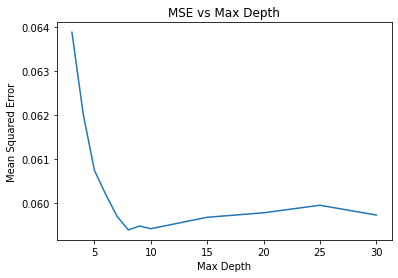

In [42]:
import matplotlib.pyplot as plt
plt.plot(md_results.keys(), md_results.values())
plt.title('MSE vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.show()

In [40]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, None]
accuracy_results = dict()
for item in max_depth:
    best_model = RandomForestClassifier(n_estimators=300,min_samples_split=5, min_samples_leaf=16, max_features='auto', max_depth=item, bootstrap=True)
    best_model.fit(X_train, y_train)
    predictions = best_model.predict(X_test)
    ac = metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None)
    accuracy_results[item] = ac
    
print(accuracy_results)

{3: 0.9360957173000672, 4: 0.9381315649129316, 5: 0.9391842697150277, 6: 0.9398659772300415, 7: 0.9403250863728059, 8: 0.9405523222111438, 9: 0.9405662346094095, 10: 0.9406636213972686, 15: 0.9403065365084518, 20: 0.940107125466645, 25: 0.9400746632040253, 30: 0.9402091497205927, None: 0.9402508869153894}


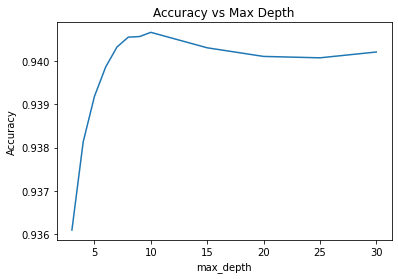

In [41]:
import matplotlib.pyplot as plt
plt.plot(accuracy_results.keys(), accuracy_results.values())
plt.title('Accuracy vs Max Depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 6, 9, 15, 20, 25, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}
# Create a based model

rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [38]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 1.4min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 2.2min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=  25.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=  25.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=  25.3s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  43.1s[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=  29.7s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 1.4min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 2.1min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 2.1min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 1.2min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time= 2.1min
[CV] END bootstrap=True, max_depth=3, max_features=a

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=  43.2s[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=  29.5s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 1.4min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  26.2s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  25.4s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 2.1min
[CV] END bootstrap=True, max_depth=3, max_features=a

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 3.5min[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=  29.7s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 2.3min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  24.6s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 1.2min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 2.0min
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time= 2.0min
[CV] END bootstrap=True, max_depth=3, max_features=

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=  42.4s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=  41.9s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 3.6min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 3.6min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=s

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=  59.9s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  43.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  42.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 3.6min
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 3.7min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_feature

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=  59.8s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 3.5min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 3.6min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  43.6s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  42.8s
[CV] END bootstrap=True, max_depth=6, max_features=

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 4.3min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 3.6min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time= 3.5min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time= 3.6min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.1min
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=  41.8s
[CV] END bootstrap=True, max_depth=6, max_feature

[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 7.2min
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time= 3.0min
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 5.0min
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 5.0min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 7.3min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 4.5min
[CV] END bootstrap=True, max_depth=15, max_fea

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time= 5.0min
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time= 1.0min
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time= 3.0min
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 5.0min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 4.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_fe

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 4.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 8.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 4.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time= 7.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time= 4.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.4min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 1.5min
[CV] END bootstrap=True, max_depth=15, max_

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time= 5.0min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 8.5min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 8.4min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 5.3min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 8.5min
[CV] END bootstrap=True, max_depth=20, max_

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 8.6min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time= 5.0min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 5.3min
[CV] END bootstrap=True, max_depth=20, max_fe

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time= 5.4min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 5.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 8.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 5.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=20, max_fe

[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 5.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 8.4min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time= 8.6min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time= 5.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time= 8.4min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 5.0min
[CV] END bootstrap=True, max_depth=20, max_f

[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 8.8min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 5.6min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 9.4min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 9.4min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 5.6min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time= 9.4min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time= 5.7min
[CV] END bootstrap=True, max_depth=30, max_f

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [3, 6, 9, 15, 20, 25, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 300, 500]},
             verbose=2)


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 9.4min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 5.4min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 9.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time= 5.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max_f


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time= 9.1min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 9.0min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time= 5.4min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 8.8min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 5.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.9min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time= 1.9min
[CV] END bootstrap=True, max_depth=30, max


[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time= 5.5min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 9.1min
[CV] END bootstrap=True, max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time= 8.8min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time= 5.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time= 9.5min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time= 5.4min
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time= 1.8min
[CV] END bootstrap=True, max_depth=30, max

In [39]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [43]:
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print("Accuracy:",metrics.accuracy_score(test_labels, predictions))
    print(classification_report(test_labels, predictions))
    return predictions

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy: 0.9406033343381176
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    193967
           1       0.80      0.55      0.65     21668

    accuracy                           0.94    215635
   macro avg       0.87      0.77      0.81    215635
weighted avg       0.94      0.94      0.94    215635



In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier(n_estimators=300,min_samples_split=5, min_samples_leaf=16, max_features='auto', max_depth=9, bootstrap=True)
best_model = rf_random
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

In [7]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
real_array=X_test.CTCF_Binding_Sites.values

In [15]:
type(X_test.CTCF_Binding_Sites)

pandas.core.series.Series

In [16]:
df = X_test.CTCF_Binding_Sites.rename(None).to_frame().T

In [23]:
type(predictions)

numpy.ndarray

In [24]:
type(real_array)

numpy.ndarray

In [31]:
X_axis=X_test.index.values

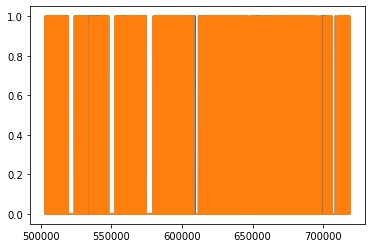

In [33]:
from matplotlib import pyplot as plt
plt.plot(X_axis, real_array)
plt.plot(X_axis, predictions)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()